In [19]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

Feature scores in descending order:
diameter_avg (2.63)
age (0.78)
itch (0.68)
border_irregularity (0.62)
smoke (0.22)
color_asymmetry (0.02)
asymmetry (0.00)


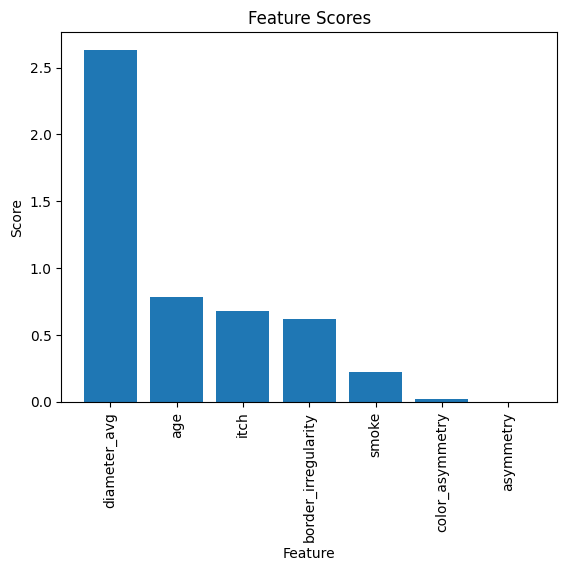

In [20]:
# Load the data into a pandas DataFrame
data = pd.read_csv('features_normalized.csv')

# Extract the output variable
y = data.iloc[:, 0].values

# Extract the features
X = data.iloc[:, 1:].values

# Scale the features to have non-negative values
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Use SelectKBest to calculate feature scores
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, y)

# Get the feature scores
scores = selector.scores_

# Print the feature scores in descending order
print('Feature scores in descending order:')
sorted_indices = np.argsort(-scores)
sorted_scores = scores[sorted_indices]
sorted_features = data.columns[sorted_indices + 1]
for i, feature in enumerate(sorted_features):
    print(f'{feature} ({sorted_scores[i]:.2f})')

# Plot the histogram
plt.bar(sorted_features, sorted_scores)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.show()